In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('Exp1.csv')

#ktore kolumhy do modelu
columns_to_use = ["Run_ID","Experiment","Replica","Tool_ID","Group","Subgroup","Position","Condition","TCond","Machined_length","Init_diameter","Final_diameter","CTime","R_measurement","ap","vc","feed","Ra","Rz","Rsk","Rku","RSm","Rt","Fx","Fy","Fz","F"
]
df = df[columns_to_use].copy()

In [14]:
# zamiana typu danych w kolumnach?
for col in columns_to_use:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [15]:
# usuwanie?
df = df.dropna()

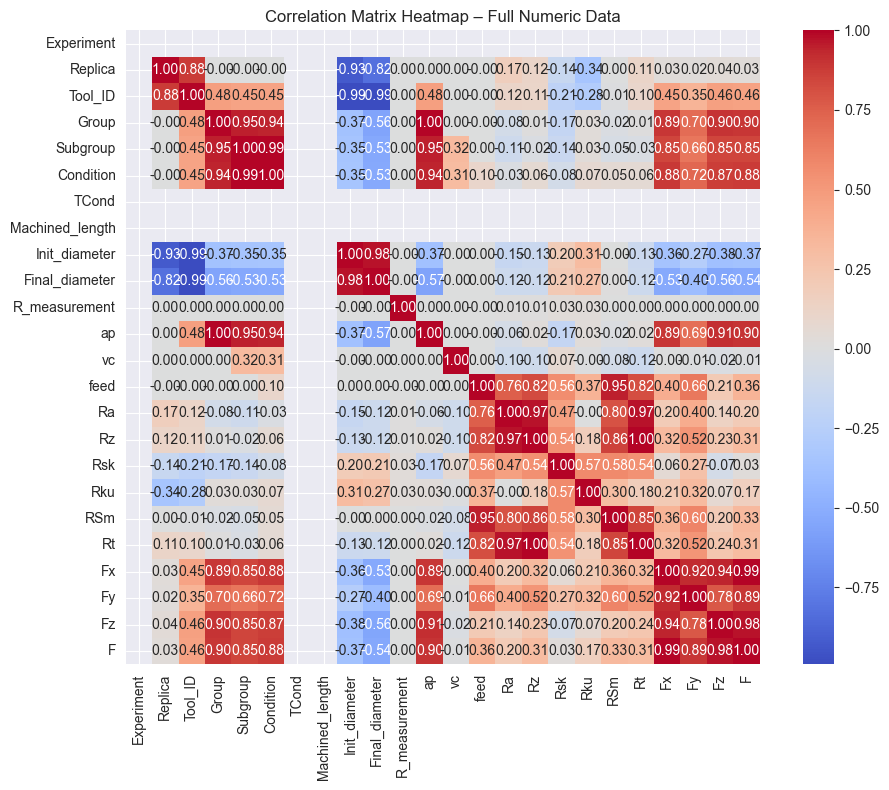

In [17]:
# Reload full dataset
df_full = pd.read_csv('Exp1.csv')

# Convert to numeric only where possible (non-numeric columns will be excluded)
df_numeric = df_full.select_dtypes(include='number')

# Drop columns that are entirely NaN (if any)
df_numeric = df_numeric.dropna(axis=1, how='all')

# Drop rows with NaNs (optional, or use df_numeric.fillna(0) if preferred)
df_numeric = df_numeric.dropna()

# Check if there are still enough columns to correlate
if df_numeric.shape[1] >= 2:
    corr_matrix_full = df_numeric.corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Matrix Heatmap – Full Numeric Data")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough valid numeric data to compute correlation matrix.")


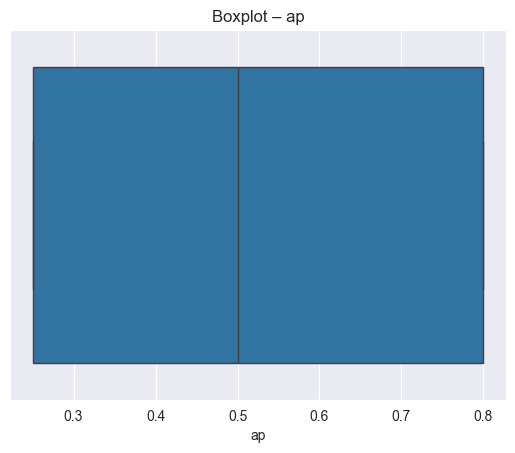

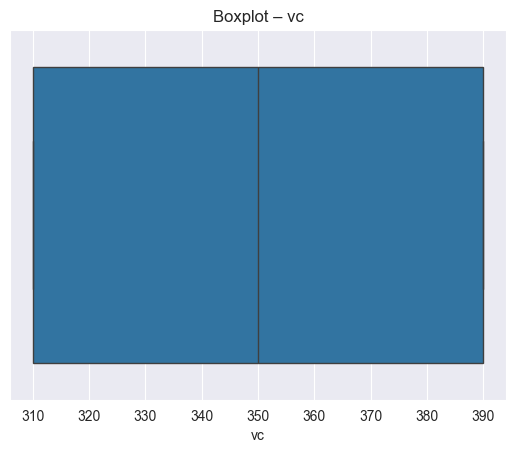

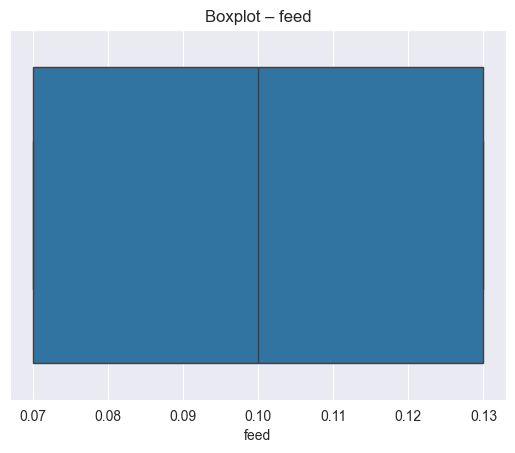

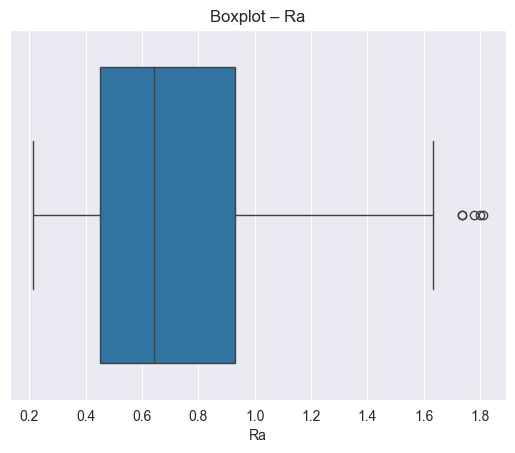

In [5]:
# wyszukiwanie outlierow
for col in ["ap", "vc", "feed", "Ra"]:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot – {col}")
    plt.show()

In [6]:
# skalowanie danych?
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["ap", "vc", "feed"]])

In [7]:
# nowy df
df_scaled = pd.DataFrame(X_scaled, columns=["ap_scaled", "vc_scaled", "feed_scaled"])
df_scaled["Ra"] = df["Ra"].values

In [8]:
# zapis
conn = sqlite3.connect('SurfaceEXP1.db')  # dodaj rozszerzenie .db (zalecane)
df_scaled.to_sql('SurfaceEXP1', conn, if_exists='replace', index=False)
conn.close()